In [3]:
import pandas as pd #importing pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
df = pd.read_csv("student.csv") #reading the dataset file
df

,Roll No,Name,Gender,Sem1,Sem2,Sem3,Sem4,average Score
0,1,Aditya,M,75.0,10.0,78.0,95.0,64.500000
1,2,Priti,F,78.0,76.0,78.0,76.0,77.000000
2,3,Arjun,M,7.0,95.0,98.0,90.0,72.500000
3,4,Bheem,M,88.0,68.0,78.0,80.0,78.500000
4,5,Raju,M,25.0,69.0,NaN,70.0,41.000000
5,6,Gaurav,M,88.0,67.0,98.0,87.0,85.000000
6,7,Gayatri,F,71.0,NaN,9.0,49.0,43.000000
7,8,Swar,M,15.0,48.0,87.0,68.0,54.500000
8,9,Rupesh,M,35.0,57.0,78.0,59.0,57.250000
9,10,Nisha,F,459.0,59.0,45.0,79.0,160.500000


In [14]:
pip install scipy



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
df.isnull().sum()

Roll No          0
Name             0
Gender           0
Sem1             2
Sem2             2
Sem3             2
Sem4             3
average Score    0
dtype: int64

In [8]:
df.isnull()

,Roll No,Name,Gender,Sem1,Sem2,Sem3,Sem4,average Score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,True,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [9]:
#displaying the rows with null values
df[df.isnull().any(axis=1)]

,Roll No,Name,Gender,Sem1,Sem2,Sem3,Sem4,average Score
4,5,Raju,M,25.0,69.0,NaN,70.0,41.000000
6,7,Gayatri,F,71.0,NaN,9.0,49.0,43.000000
11,12,Kavya,F,65.0,64.0,86.0,NaN,71.666667
13,14,Ashwini,F,NaN,61.0,48.0,23.0,44.000000
16,17,Tina,F,51.0,84.0,84.0,NaN,73.000000
17,18,Ganesh,M,26.0,87.0,NaN,42.0,51.666667
22,23,Niraj,M,45.0,84.0,38.0,NaN,55.666667
24,25,Rudra,M,NaN,56.0,68.0,586.0,236.666667
29,30,Chintu,M,24.0,NaN,65.0,45.0,44.666667


In [17]:
#Filling the null values with the mean of that column
df['Sem1'] = df['Sem1'].fillna(df['Sem1'].mean())
df

,Roll No,Name,Gender,Sem1,Sem2,Sem3,Sem4,average Score
0,1,Aditya,M,75.000000,10.0,78.0,95.0,64.500000
1,2,Priti,F,78.000000,76.0,78.0,76.0,77.000000
2,3,Arjun,M,7.000000,95.0,98.0,90.0,72.500000
3,4,Bheem,M,88.000000,68.0,78.0,80.0,78.500000
4,5,Raju,M,25.000000,69.0,NaN,70.0,41.000000
5,6,Gaurav,M,88.000000,67.0,98.0,87.0,85.000000
6,7,Gayatri,F,71.000000,NaN,9.0,49.0,43.000000
7,8,Swar,M,15.000000,48.0,87.0,68.0,54.500000
8,9,Rupesh,M,35.000000,57.0,78.0,59.0,57.250000
9,10,Nisha,F,459.000000,59.0,45.0,79.0,160.500000


In [8]:
#Filling the null values with 0
df['Sem2'] = df['Sem2'].fillna(0)
df

,Roll No,Name,Gender,Sem1,Sem2,Sem3,Sem4,average Score
0,1,Aditya,M,75.0,10.0,78.0,95.0,64.500000
1,2,Priti,F,78.0,76.0,78.0,76.0,77.000000
2,3,Arjun,M,7.0,95.0,98.0,90.0,72.500000
3,4,Bheem,M,88.0,68.0,78.0,80.0,78.500000
4,5,Raju,M,25.0,69.0,Missing,70.0,41.000000
5,6,Gaurav,M,88.0,67.0,98.0,87.0,85.000000
6,7,Gayatri,F,71.0,0.0,9.0,49.0,43.000000
7,8,Swar,M,15.0,48.0,87.0,68.0,54.500000
8,9,Rupesh,M,35.0,57.0,78.0,59.0,57.250000
9,10,Nisha,F,459.0,59.0,45.0,79.0,160.500000


In [11]:
#Filling the null values with "Missing" word
df['Sem3'] = df['Sem3'].fillna("Missing")
df

,Roll No,Name,Gender,Sem1,Sem2,Sem3,Sem4,average Score
0,1,Aditya,M,75.0,10.0,78.0,95.0,64.500000
1,2,Priti,F,78.0,76.0,78.0,76.0,77.000000
2,3,Arjun,M,7.0,95.0,98.0,90.0,72.500000
3,4,Bheem,M,88.0,68.0,78.0,80.0,78.500000
4,5,Raju,M,25.0,69.0,Missing,70.0,41.000000
5,6,Gaurav,M,88.0,67.0,98.0,87.0,85.000000
6,7,Gayatri,F,71.0,0.0,9.0,49.0,43.000000
7,8,Swar,M,15.0,48.0,87.0,68.0,54.500000
8,9,Rupesh,M,35.0,57.0,78.0,59.0,57.250000
9,10,Nisha,F,459.0,59.0,45.0,79.0,160.500000


In [12]:
df.dropna()


,Roll No,Name,Gender,Sem1,Sem2,Sem3,Sem4,average Score
0,1,Aditya,M,75.0,10.0,78.0,95.0,64.500000
1,2,Priti,F,78.0,76.0,78.0,76.0,77.000000
2,3,Arjun,M,7.0,95.0,98.0,90.0,72.500000
3,4,Bheem,M,88.0,68.0,78.0,80.0,78.500000
4,5,Raju,M,25.0,69.0,Missing,70.0,41.000000
5,6,Gaurav,M,88.0,67.0,98.0,87.0,85.000000
6,7,Gayatri,F,71.0,0.0,9.0,49.0,43.000000
7,8,Swar,M,15.0,48.0,87.0,68.0,54.500000
8,9,Rupesh,M,35.0,57.0,78.0,59.0,57.250000
9,10,Nisha,F,459.0,59.0,45.0,79.0,160.500000


In [10]:
#Droping the rows with null values
df.dropna()

,Roll No,Name,Gender,Sem1,Sem2,Sem3,Sem4,average Score
0,1,Aditya,M,75.0,10.0,78.0,95.0,64.500000
1,2,Priti,F,78.0,76.0,78.0,76.0,77.000000
2,3,Arjun,M,7.0,95.0,98.0,90.0,72.500000
3,4,Bheem,M,88.0,68.0,78.0,80.0,78.500000
4,5,Raju,M,25.0,69.0,Missing,70.0,41.000000
5,6,Gaurav,M,88.0,67.0,98.0,87.0,85.000000
6,7,Gayatri,F,71.0,0.0,9.0,49.0,43.000000
7,8,Swar,M,15.0,48.0,87.0,68.0,54.500000
8,9,Rupesh,M,35.0,57.0,78.0,59.0,57.250000
9,10,Nisha,F,459.0,59.0,45.0,79.0,160.500000


In [41]:
df["Sem2"].min()

0.0

<Axes: >

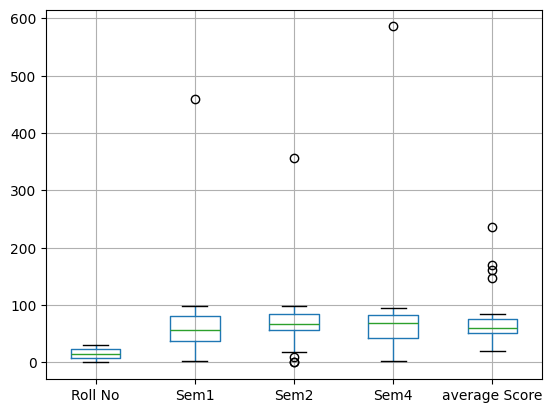

In [13]:
df.boxplot()

In [43]:
print(np.where(df["Sem2"]<20))

(array([ 0,  6, 26, 29], dtype=int64),)


In [14]:
newdf=df[df["Sem2"]>30]
newdf

,Roll No,Name,Gender,Sem1,Sem2,Sem3,Sem4,average Score
1,2,Priti,F,78.0,76.0,78.0,76.0,77.000000
2,3,Arjun,M,7.0,95.0,98.0,90.0,72.500000
3,4,Bheem,M,88.0,68.0,78.0,80.0,78.500000
4,5,Raju,M,25.0,69.0,Missing,70.0,41.000000
5,6,Gaurav,M,88.0,67.0,98.0,87.0,85.000000
7,8,Swar,M,15.0,48.0,87.0,68.0,54.500000
8,9,Rupesh,M,35.0,57.0,78.0,59.0,57.250000
9,10,Nisha,F,459.0,59.0,45.0,79.0,160.500000
10,11,Rucha,F,87.0,356.0,90.0,58.0,147.750000
11,12,Kavya,F,65.0,64.0,86.0,NaN,71.666667


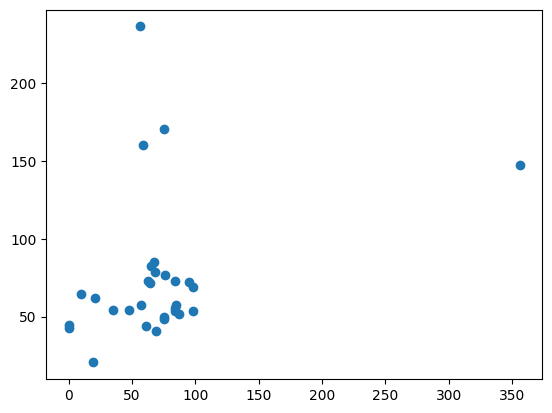

In [47]:
x=df['Sem2']
y=df['average Score']
plt.scatter(x,y)
plt.show()

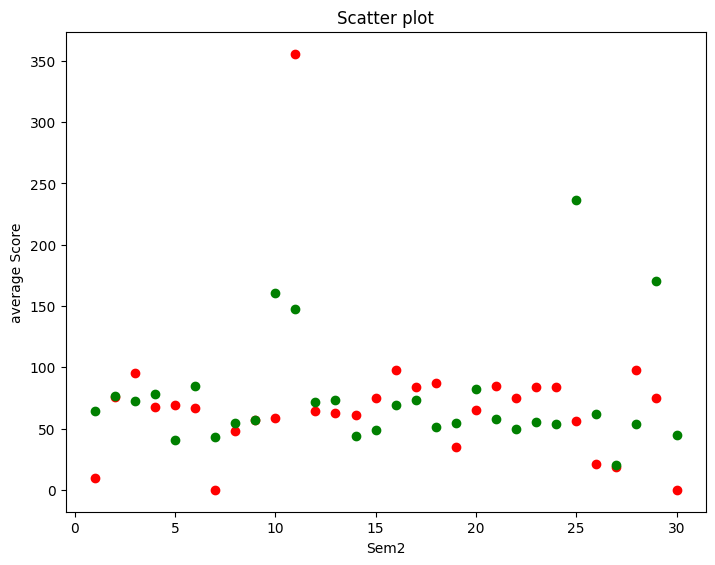

In [48]:
x=df["Sem2"]
y=df["average Score"]
z=df["Roll No"]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(z,x,color='r')
ax.scatter(z,y,color='g')
ax.set_xlabel('Sem2')
ax.set_ylabel('average Score')
ax.set_title('Scatter plot')
plt.show()

In [60]:
z=np.abs(stats.zscore(df['Sem1']))
z2=np.abs(stats.zscore(df['Sem2']))
#z3=np.abs(stats.zscore(df['Sem3']))
z4=np.abs(stats.zscore(df['Sem4']))
print(z)

0     0.059907
1     0.098916
2     0.824298
3     0.228946
4     0.590244
5     0.228946
6     0.007895
7     0.720274
8     0.460214
9     5.053062
10    0.215943
11    0.070123
12    0.033901
13    0.000000
14    0.332970
15    0.291174
16    0.252165
17    0.577241
18    0.330184
19    0.319967
20    0.098916
21    0.148141
22    0.330184
23    0.876310
24    0.000000
25    0.358976
26    0.330184
27    0.213156
28    0.421205
29    0.603247
Name: Sem1, dtype: float64


In [61]:
Q1=np.quantile(df['Sem1'],0.25)
Q3=np.quantile(df['Sem1'],0.75)
IQR=Q3-Q1
print("Q1 :: ",Q1)
print("Q3 :: ",Q3)
print("IQR :: ",IQR)

Q1 ::  39.75
Q3 ::  78.0
IQR ::  38.25


In [62]:
Q1=np.quantile(df['Sem2'],0.25)
Q3=np.quantile(df['Sem2'],0.75)
IQR=Q3-Q1
print("Q1 :: ",Q1)
print("Q3 :: ",Q3)
print("IQR :: ",IQR)
upper_2 = Q3 + 1.5*IQR
lower_2 = Q1 - 1.5*IQR
print("lower bound :: ",lower_2)
print("upper bound :: ",upper_2)

Q1 ::  56.25
Q3 ::  84.0
IQR ::  27.75
lower bound ::  14.625
upper bound ::  125.625


In [63]:
print(np.where(df['Sem2']<lower_2))

(array([ 0,  6, 29], dtype=int64),)


In [64]:
print(np.where(df['Sem2']>upper_2))

(array([10], dtype=int64),)


In [65]:
df.drop([10], inplace=True)
print(df)

    Roll No      Name Gender        Sem1  Sem2     Sem3   Sem4  average Score
0         1    Aditya      M   75.000000  10.0     78.0   95.0      64.500000
1         2     Priti      F   78.000000  76.0     78.0   76.0      77.000000
2         3     Arjun      M    7.000000  95.0     98.0   90.0      72.500000
3         4     Bheem      M   88.000000  68.0     78.0   80.0      78.500000
4         5      Raju      M   25.000000  69.0  Missing   70.0      41.000000
5         6    Gaurav      M   88.000000  67.0     98.0   87.0      85.000000
6         7   Gayatri      F   71.000000   0.0      9.0   49.0      43.000000
7         8      Swar      M   15.000000  48.0     87.0   68.0      54.500000
8         9    Rupesh      M   35.000000  57.0     78.0   59.0      57.250000
9        10     Nisha      F  459.000000  59.0     45.0   79.0     160.500000
11       12     Kavya      F   65.000000  64.0     86.0    NaN      71.666667
12       13     Priya      F   73.000000  63.0     87.0   69.0  

In [66]:
Q4 = np.quantile(df['Sem4'],0.90)
Q5 = np.quantile(df['Sem4'],0.10)
IQR=Q4-Q5
print("Q4 :: ",Q4)
print("Q5 :: ",Q5)
print("IQR :: ",IQR)
upper_bound = Q4 + 1.5*IQR
lower_bound = Q5 - 1.5*IQR
print("lower bound :: ",lower_bound)
print("upper bound :: ",upper_bound)

Q4 ::  nan
Q5 ::  nan
IQR ::  nan
lower bound ::  nan
upper bound ::  nan


In [67]:
print(df)

    Roll No      Name Gender        Sem1  Sem2     Sem3   Sem4  average Score
0         1    Aditya      M   75.000000  10.0     78.0   95.0      64.500000
1         2     Priti      F   78.000000  76.0     78.0   76.0      77.000000
2         3     Arjun      M    7.000000  95.0     98.0   90.0      72.500000
3         4     Bheem      M   88.000000  68.0     78.0   80.0      78.500000
4         5      Raju      M   25.000000  69.0  Missing   70.0      41.000000
5         6    Gaurav      M   88.000000  67.0     98.0   87.0      85.000000
6         7   Gayatri      F   71.000000   0.0      9.0   49.0      43.000000
7         8      Swar      M   15.000000  48.0     87.0   68.0      54.500000
8         9    Rupesh      M   35.000000  57.0     78.0   59.0      57.250000
9        10     Nisha      F  459.000000  59.0     45.0   79.0     160.500000
11       12     Kavya      F   65.000000  64.0     86.0    NaN      71.666667
12       13     Priya      F   73.000000  63.0     87.0   69.0  